<a href="https://colab.research.google.com/github/giuliabugatti09/bank_credit_card_churn_predicition/blob/main/modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

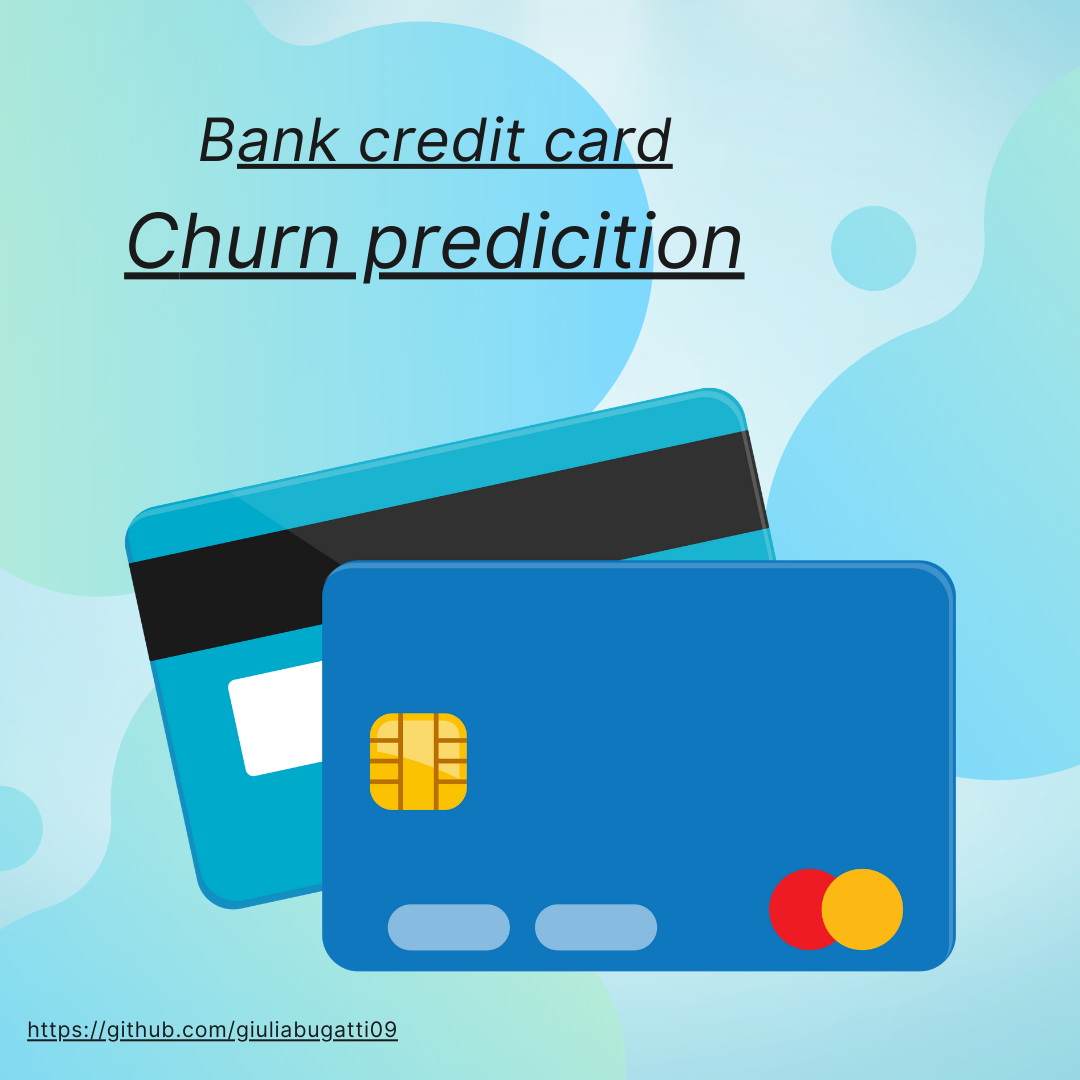

# **Previsão de Cancelamento do Serviço de Cartão de Crédito do Banco**

# 📊 Análise Preditiva de Cancelamento de Cartões de Crédito- Modelagem

## 1. Sobre o Projeto
Este projeto tem como objetivo desenvolver um modelo preditivo para antecipar o risco de cancelamento de cartões de crédito, utilizando Machine Learning para identificar padrões nos dados históricos dos clientes. A análise considera informações como comportamento de compra, pagamentos e histórico de crédito, ajudando bancos a melhorar suas estratégias de retenção.

---

## 2. Tecnologias e Ferramentas
O projeto foi desenvolvido em **Python**, utilizando:
- **Pandas** e **NumPy** para manipulação de dados
- **Matplotlib** e **Seaborn** para visualização de dados
- **Scikit-Learn** e **XGBoost** para modelagem preditiva
- **Google Colab** como ambiente de desenvolvimento
- **GitHub** para versionamento e colaboração do código

---

## 3. Problema de Negócio e Objetivo do Projeto

### 3.1 Qual o problema de negócio?
O gerente do banco está preocupado com o crescente número de clientes que cancelam seus cartões de crédito. Seria extremamente útil prever a probabilidade de um cliente se desligar, permitindo ao banco agir proativamente para oferecer melhores serviços e evitar cancelamentos.

### 3.2 Qual o contexto?
O cancelamento de cartões impacta negativamente a rentabilidade dos bancos, tornando essencial a análise de três indicadores principais:
- **CAC (Custo de Aquisição de Cliente)**: Quanto menor, mais eficiente a aquisição.
- **CLV (Valor Vitalício do Cliente)**: Mede a receita total gerada ao longo do relacionamento.
- **Taxa de Churn**: Percentual de clientes que cancelam seus cartões.

Para aumentar a rentabilidade, o banco deve **minimizar o CAC e o churn enquanto maximiza o CLV**. O modelo preditivo ajudará a identificar clientes em risco, permitindo ações estratégicas para retenção.

### 3.3 Objetivos do projeto
- Identificar os principais fatores associados ao churn de clientes.
- Desenvolver um modelo preditivo para estimar a probabilidade de churn.
- Fornecer estratégias acionáveis para reduzir o cancelamento de cartões de crédito.

### 3.4 Benefícios do projeto
✅ **Redução de Custos**: Diminui os gastos com aquisição de novos clientes.
✅ **Melhoria na Retenção de Clientes**: Permite estratégias proativas para manter clientes em risco.
✅ **Experiência do Cliente Aprimorada**: Intervenções personalizadas aumentam a satisfação.
✅ **Marketing Direcionado**: Auxilia na criação de campanhas mais eficazes.
✅ **Proteção de Receita**: Minimiza perdas com churn e maximiza o CLV.

### 3.5 Conclusão
Prever a probabilidade de churn fornece insights mais úteis do que previsões binárias (1/0), permitindo que o banco entenda o risco de cancelamento de cada cliente. Isso possibilita uma **alocação mais eficiente de recursos** e a **implementação de estratégias de retenção** mais eficazes, priorizando clientes com maior probabilidade de churn.

---




# 4- Carregando os dados

**4.1- Importando as bibliotecas**

In [ ]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Divisão dos dados
from sklearn.model_selection import train_test_split

# Filtrar avisos
import warnings
warnings.filterwarnings('ignore')

### Configurações de Visualização
%matplotlib inline


mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Definição da paleta de cores
paleta_cores = ['#264653', '#2a9d8f', '#5b9bd5', '#1f4e79', '#e76f51', '#8ab17d']
# Configurar como paleta padrão
sns.set_palette(sns.color_palette(paleta_cores))
# Exibir a paleta
sns.color_palette(paleta_cores)


[(0.14901960784313725, 0.27450980392156865, 0.3254901960784314),
 (0.16470588235294117, 0.615686274509804, 0.5607843137254902),
 (0.3568627450980392, 0.6078431372549019, 0.8352941176470589),
 (0.12156862745098039, 0.3058823529411765, 0.4745098039215686),
 (0.9058823529411765, 0.43529411764705883, 0.3176470588235294),
 (0.5411764705882353, 0.6941176470588235, 0.49019607843137253)]

**4.2- Entendendo os dados**

In [ ]:
import pandas as pd

# Caminho do arquivo
data_path = 'https://raw.githubusercontent.com/giuliabugatti09/bank_credit_card_churn_predicition/main/input/BankChurners.csv'

df = pd.read_csv(data_path)

# Recursos que podem ser removidos.
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)



In [ ]:
df.head()


,"CLIENTNUM""",Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM"                10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
"CLIENTNUM""",10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
df.isna().sum()


,0
"CLIENTNUM""",0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


Não há valores ausentes ou duplicados.


**4.3- Dividindo os dados em conjuntos de treinamento e teste**

In [ ]:
# Dividir os dados em variáveis preditoras (X) e variável alvo (y)
# Ensure the column name is correct, including case and whitespace
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag'].copy()  # Changed 'churn_flag' to 'Attrition_Flag'

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imprimir as formas dos conjuntos de treino e teste
print(f'Forma do conjunto de treino (preditor): {X_train.shape}.')
print(f'Forma do conjunto de treino (alvo): {y_train.shape}.')
print(f'Forma do conjunto de teste (preditor): {X_test.shape}.')
print(f'Forma do conjunto de teste (alvo): {y_test.shape}.')

Forma do conjunto de treino (preditor): (8101, 20).
Forma do conjunto de treino (alvo): (8101,).
Forma do conjunto de teste (preditor): (2026, 20).
Forma do conjunto de teste (alvo): (2026,).


**4.4- Engenharia de recursos, limpeza e pré-processamento de dados**

In [ ]:
X_train.head()


,"CLIENTNUM""",Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1602,806407308,54,F,3,College,Single,Unknown,Blue,49,6,2,3,13184.0,0,13184.0,1.166,2047,33,0.179,0.000
7791,801786483,51,M,0,High School,Single,$80K - $120K,Blue,45,3,2,3,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236
7177,779870883,45,F,4,High School,Single,$40K - $60K,Blue,29,3,2,1,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388
97,720336708,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450
4820,716769783,48,F,2,Graduate,Married,Unknown,Blue,40,3,2,4,5104.0,736,4368.0,0.679,3943,78,0.696,0.144


**4.5- Verificando os recursos numéricos.**

In [ ]:
numerical_features = X_train.select_dtypes('number').columns.to_list()
print(f'São {len(numerical_features)} recursos numéricos.')
print('Eles são:')
print(numerical_features)

São 15 recursos numéricos.
Eles são:
['CLIENTNUM"', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


**4.6- Verificando os recursos categóricos e os valores exclusivos.**

In [ ]:
categorical_features = X_train.select_dtypes('object').columns.to_list()
print(f'São {len(categorical_features)} recursos categóricos.')
print('Eles são: ')
print(categorical_features)

São 5 recursos categóricos.
Eles são: 
['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'São {X_train[feature].nunique()} unique values. Eles são: ')
    print(X_train[feature].value_counts(normalize=True))
    print()

Gender
----------------------------------------
São 2 unique values. Eles são: 
Gender
F    0.526108
M    0.473892
Name: proportion, dtype: float64

Education_Level
----------------------------------------
São 7 unique values. Eles são: 
Education_Level
Graduate         0.301444
High School      0.197877
Unknown          0.152080
Uneducated       0.150475
College          0.102333
Post-Graduate    0.049870
Doctorate        0.045920
Name: proportion, dtype: float64

Marital_Status
----------------------------------------
São 4 unique values. Eles são: 
Marital_Status
Married     0.463523
Single      0.389582
Unknown     0.073941
Divorced    0.072954
Name: proportion, dtype: float64

Income_Category
----------------------------------------
São 6 unique values. Eles são: 
Income_Category
Less than $40K    0.350327
$40K - $60K       0.178003
$80K - $120K      0.153561
$60K - $80K       0.136279
Unknown           0.107764
$120K +           0.074065
Name: proportion, dtype: float64

Card_Cat

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

# Carregar os dados
data_path = 'https://raw.githubusercontent.com/giuliabugatti09/bank_credit_card_churn_predicition/main/input/BankChurners.csv'
df = pd.read_csv(data_path)

# Converter a flag de churn para categoria
df['Churn_Flag'] = df['Attrition_Flag'].apply(lambda x: 'Churn' if x == 'Attrited Customer' else 'No Churn')

# Dividir os dados em variáveis preditoras (X) e variável alvo (y)
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag'].copy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar a forma do conjunto de treino
print(f'Forma do conjunto de treino: {X_train.shape}')

# Definir classes personalizadas
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # Nenhum ajuste necessário para este exemplo

    def transform(self, X):
        # Realizar engenharia de características aqui
        X['education_income_levels'] = X['Education_Level'] + '_' + X['Income_Category']
        X['total_spending'] = X['Total_Trans_Amt'] + X['Total_Revolving_Bal']
        X['inactivity_contacts'] = X['Months_Inactive_12_mon'] * X['Contacts_Count_12_mon']
        X['age_per_tenure'] = X['Customer_Age'] / X['Months_on_book']
        X['products_per_tenure'] = X['Total_Relationship_Count'] / X['Months_on_book']
        X['trans_ct_per_tenure'] = X['Total_Trans_Ct'] / X['Months_on_book']
        X['trans_amt_per_tenure'] = X['Total_Trans_Amt'] / X['Months_on_book']
        X['products_per_contacts'] = X['Total_Relationship_Count'] / X['Contacts_Count_12_mon']
        X['dependents_per_contacts'] = X['Dependent_count'] / X['Contacts_Count_12_mon']
        X['trans_ct_per_contacts'] = X['Total_Trans_Ct'] / X['Contacts_Count_12_mon']
        X['products_per_inactivity'] = X['Total_Relationship_Count'] / X['Months_Inactive_12_mon']
        X['dependents_per_inactivity'] = X['Dependent_count'] / X['Months_Inactive_12_mon']
        X['trans_ct_per_inactivity'] = X['Total_Trans_Ct'] / X['Months_Inactive_12_mon']
        X['trans_amt_per_credit_limit'] = X['Total_Trans_Amt'] / X['Credit_Limit']
        X['proportion_inactive_months'] = X['Months_Inactive_12_mon'] / 12
        X['credit_util_rate'] = X['Total_Revolving_Bal'] / X['Credit_Limit']
        X['trans_amt_per_products'] = X['Total_Trans_Amt'] / X['Total_Relationship_Count']
        X['trans_ct_per_products'] = X['Total_Trans_Ct'] / X['Total_Relationship_Count']
        X['products_per_dependent'] = X['Total_Relationship_Count'] / X['Dependent_count']
        X['trans_amt_per_dependent'] = X['Total_Trans_Amt'] / X['Dependent_count']
        X['trans_ct_per_dependent'] = X['Total_Trans_Ct'] / X['Dependent_count']
        return X

class OneHotFeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, to_encode):
        self.to_encode = to_encode
        self.encoder = None

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.encoder.fit(X[self.to_encode])
        return self

    def transform(self, X):
        encoded_data = self.encoder.transform(X[self.to_encode])
        encoded_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(self.to_encode))
        X = X.drop(columns=self.to_encode)  # Remover colunas originais
        X = pd.concat([X, encoded_df], axis=1)  # Concatenar características codificadas
        return X

class StandardFeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, to_scale):
        self.to_scale = to_scale
        self.scaler = None

    def fit(self, X, y=None):
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.to_scale])
        return self

    def transform(self, X):
        X[self.to_scale] = self.scaler.transform(X[self.to_scale])
        return X

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, to_drop):
        self.to_drop = to_drop

    def fit(self, X, y=None):
        return self  # Nenhum ajuste necessário

    def transform(self, X):
        return X.drop(columns=self.to_drop, errors='ignore')  # errors='ignore' para evitar erros se as colunas já foram removidas

# Definir as colunas a serem codificadas, padronizadas e removidas
to_encode = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
to_scale = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
            'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
to_drop = ['CLIENTNUM']

# Criar o pipeline
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('one_hot_encoding', OneHotFeatureEncoder(to_encode=to_encode)),
    ('scaling', StandardFeatureScaler(to_scale=to_scale)),
    ('column_dropper', ColumnDropper(to_drop=to_drop))
])

# Aplicar o pipeline nos dados de treino
X_train_transformed = pipeline.fit_transform(X_train)

# Verificar a forma do conjunto de treino transformado
print(f'Forma do conjunto de treino transformado: {X_train_transformed.shape}')


Forma do conjunto de treino: (8101, 23)
Forma do conjunto de treino transformado: (9702, 62)


In [ ]:
X_train_transformed.head()

,"CLIENTNUM""",Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
1602,806407308.0,0.960879,3.0,1.641549,6.0,2.0,3.0,0.499350,-1.426933,0.627046,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7791,801786483.0,0.585187,0.0,1.138843,3.0,2.0,3.0,0.220896,1.662813,0.072169,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7177,779870883.0,-0.166196,4.0,-0.871977,3.0,2.0,1.0,-0.443727,0.759336,-0.511698,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
97,720336708.0,0.835648,3.0,-0.117919,5.0,3.0,2.0,-0.532227,0.667269,-0.591970,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4820,716769783.0,0.209496,2.0,0.510462,3.0,2.0,4.0,-0.387839,-0.523456,-0.341051,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


O comando `!pip install category_encoders` instala a biblioteca que permite aplicar técnicas como **Target Encoding**, convertendo variáveis categóricas em formatos numéricos adequados para Machine Learning.

In [ ]:
!pip install category_encoders

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder # Import the TargetEncoder

tree_preprocessor = Pipeline(
    steps=[
        ('feature_engineer', FeatureEngineer()),
        ('one_hot_encoder', OneHotFeatureEncoder(to_encode=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])), # Correct the column names here
        # ('ordinal_encoder', OrdinalFeatureEncoder(to_encode=ordinal_encoding_orders)), # Comment out or define OrdinalFeatureEncoder if needed
        # ('target_encoder', TargetEncoder(cols=target_encoding_features)), # Comment out or define target_encoding_features if needed
        ('col_dropper', ColumnDropper(to_drop=to_drop_features)) # Make sure to_drop_features is defined
    ]
)

# Apply the pipeline to training data
X_train_prepared_tree = tree_preprocessor.fit_transform(X_train, y_train)
X_train_prepared_tree.shape # Check the shape of the transformed data

(9702, 62)

In [ ]:
X_train_prepared_tree.head()


,"CLIENTNUM""",Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
1602,806407308.0,54.0,3.0,49.0,6.0,2.0,3.0,13184.0,0.0,13184.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7791,801786483.0,51.0,0.0,45.0,3.0,2.0,3.0,10648.0,2517.0,8131.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7177,779870883.0,45.0,4.0,29.0,3.0,2.0,1.0,4595.0,1781.0,2814.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
97,720336708.0,53.0,3.0,35.0,5.0,3.0,2.0,3789.0,1706.0,2083.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4820,716769783.0,48.0,2.0,40.0,3.0,2.0,4.0,5104.0,736.0,4368.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**4.7- Treinamento, comparação, seleção e ajuste de modelo**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
linear_models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'KNN': KNeighborsClassifier(),
}

tree_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier()
}

# 5- Visualização de dados

**5.1- Linear Models**

,model,avg_val_score,train_score
0,Logistic Regression,0.46,0.59
1,Linear SVC,0.35,0.57
2,KNN,0.44,0.62


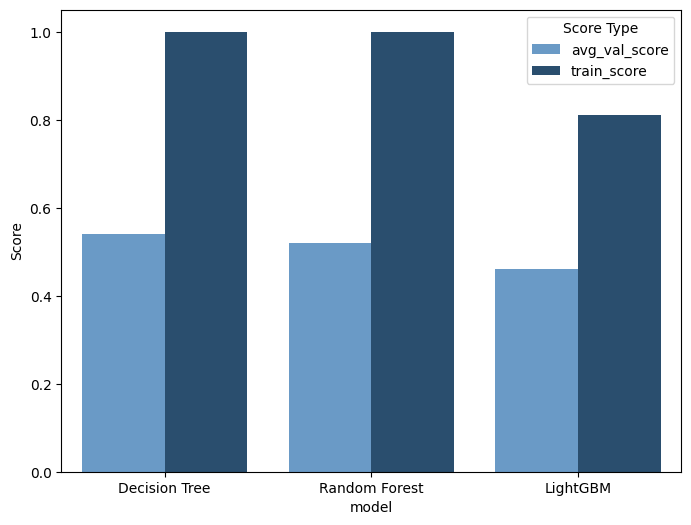

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

linear_models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'KNN': KNeighborsClassifier(),
}

def evaluate_models(models, X, y):
    results = []
    for model_name, model in models.items():
        # Calculate average validation score
        avg_val_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

        # Calculate training score
        train_score = accuracy_score(y, model.fit(X, y).predict(X))

        results.append([model_name, avg_val_score, train_score])

    return pd.DataFrame(results, columns=['model', 'avg_val_score', 'train_score'])

# Assuming you have X and y defined (your data)
linear_eval_df = evaluate_models(linear_models, X, y)

# Display the DataFrame
display(linear_eval_df)  # This line added to display the table

plot_data = pd.melt(tree_eval_df, id_vars='model', value_vars=['avg_val_score', 'train_score'],
                    var_name='Score Type', value_name='Score')

# Create the bar plot with custom colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='model', y='Score', hue='Score Type', data=plot_data, palette={'avg_val_score': '#5b9bd5', 'train_score': '#1f4e79'})

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Update legend with new colors
ax.legend(handles, labels, title='Score Type')

plt.show()

**5.2- Tree Models**

[LightGBM] [Info] Number of positive: 43, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537500 -> initscore=0.150282
[LightGBM] [Info] Start training from score 0.150282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,model,avg_val_score,train_score
0,Decision Tree,0.54,1.00
1,Random Forest,0.52,1.00
2,LightGBM,0.46,0.81


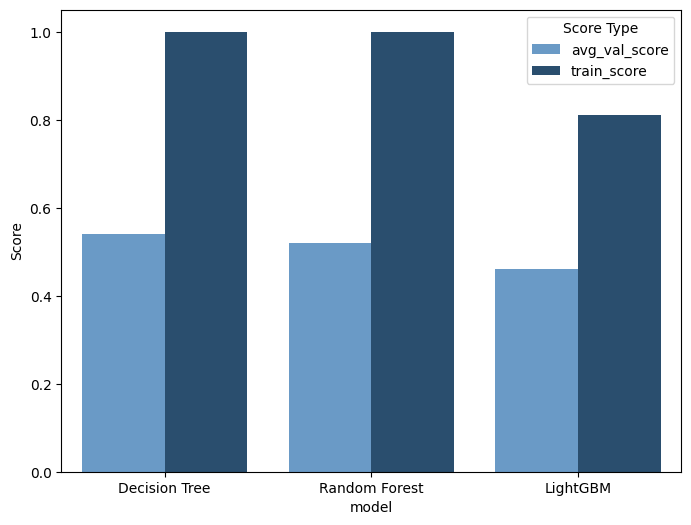

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define your tree-based models
tree_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier()
}

# Function to evaluate models (same as before)
def evaluate_models(models, X, y):
    results = []
    for model_name, model in models.items():
        # Calculate average validation score
        avg_val_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

        # Calculate training score
        train_score = accuracy_score(y, model.fit(X, y).predict(X))

        results.append([model_name, avg_val_score, train_score])

    return pd.DataFrame(results, columns=['model', 'avg_val_score', 'train_score'])

# Assuming you have X and y defined (your data)
tree_eval_df = evaluate_models(tree_models, X, y)  # Evaluate tree-based models

# Display the DataFrame
display(tree_eval_df)

# Prepare data for plotting (Corrected value_vars)
plot_data = pd.melt(tree_eval_df, id_vars='model', value_vars=['avg_val_score', 'train_score'],
                    var_name='Score Type', value_name='Score')

# Create the bar plot with custom colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='model', y='Score', hue='Score Type', data=plot_data, palette={'avg_val_score': '#5b9bd5', 'train_score': '#1f4e79'})

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Update legend with new colors
ax.legend(handles, labels, title='Score Type')

plt.show()

**5.3- Ajuste de Hiperparâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical and numerical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Create a preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Define the parameter grid for GridSearchCV, searching over parameters of the classifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create and fit the GridSearchCV object using the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_search.best_params_}')

Melhores parâmetros: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


**5.4- Curva ROC e AUC**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


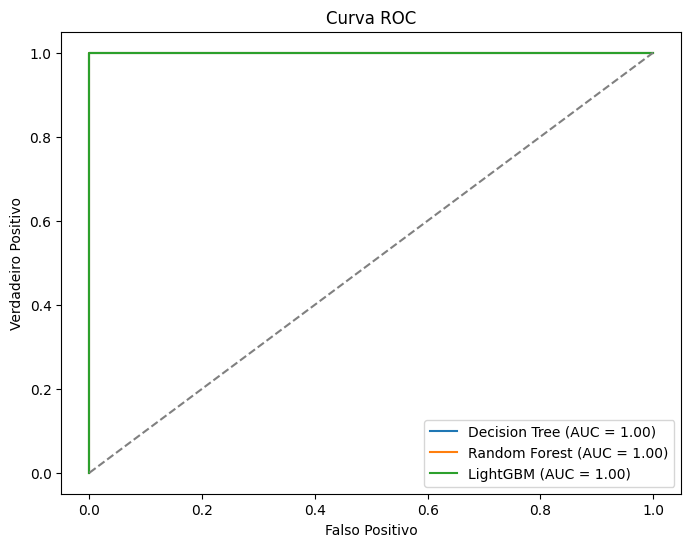

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# 1. Define categorical and numerical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# 2. Create a preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# 3. Create a ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Numerical features are passed through
        ('cat', categorical_transformer, categorical_features)  # Categorical features are one-hot encoded
])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 4. Retrain tree_models on the transformed training data
tree_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier()
}

for name, model in tree_models.items():
    model.fit(X_train_transformed, y_train)  # Retrain on transformed data

# 5. Generate ROC curve and AUC
plt.figure(figsize=(8, 6))

# Create a LabelBinarizer to convert string labels to numerical
lb = LabelBinarizer()
lb.fit(y_train)  # Fit it on the training data to learn the classes

for name, model in tree_models.items():
    # Predict probabilities using the transformed test data
    y_prob = model.predict_proba(X_test_transformed)[:, 1]

    # Transform y_test to numerical using the fitted LabelBinarizer
    y_test_binarized = lb.transform(y_test)

    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob) # Use binarized y_test
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

**5.5- Matriz de Confusão para Analisar Erros**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


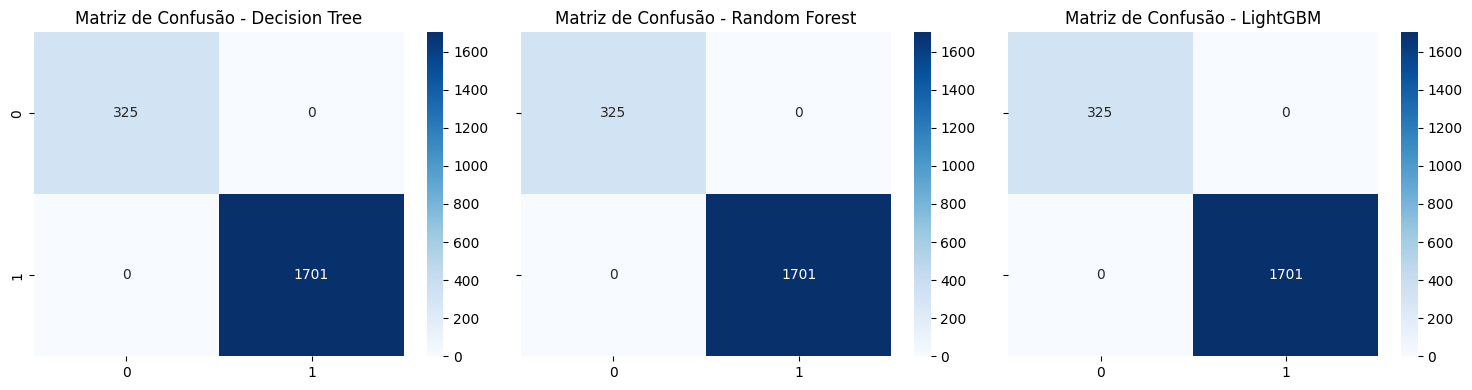

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Transform X_test using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Create subplots
fig, axes = plt.subplots(1, len(tree_models), figsize=(15, 4), sharey=True) # 1 row, n cols

# Plot confusion matrices in subplots
for i, (name, model) in enumerate(tree_models.items()):
    y_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i]) # Plot on subplot
    axes[i].set_title(f'Matriz de Confusão - {name}')

plt.tight_layout() # Adjust spacing between subplots
plt.show()


## 6. Pipeline da Solução
O pipeline seguiu o framework **CRISP-DM** e incluiu as seguintes etapas:
1. **Definição do problema de negócio** 📌
2. **Coleta e análise inicial dos dados** 📊
3. **Divisão dos dados em conjuntos de treino e teste** 🔍
4. **Análise exploratória dos dados (EDA)** 📈
5. **Engenharia de features, limpeza e pré-processamento dos dados** 🔧
6. **Treinamento, comparação, seleção de features e ajuste de modelos** 🤖
7. **Interpretação dos resultados** 🎯


#7. Resultados Financeiros

Para avaliar a viabilidade financeira do projeto, foi estimado um resultado financeiro base. Como os dados específicos para calcular o ganho exato não estavam disponíveis, foi considerada uma fonte comum de receita das empresas de cartões de crédito: a cobrança de taxas sobre o saldo devedor (total revolving balance), que os portadores de cartão carregam de mês a mês.

Assumindo uma taxa de 18% sobre o saldo devedor, o cálculo foi realizado da seguinte forma:

- Ganho verdadeiro positivo: 10% de taxa sobre os saldos devedores como estratégia de retenção.

- Custo de retenção de falsos positivos: Desconto de 8% sobre os saldos devedores.

- Custo de falsos negativos (clientes que cancelaram): Custo total da taxa de 18% que teria sido recebida se o cliente não tivesse cancelado.

A partir dessa estimativa, o ganho financeiro do modelo foi $171,477, um resultado significativo!

Com isso, o projeto atingiu seu objetivo, permitindo ao banco acessar as probabilidades de churn dos clientes, facilitando decisões mais informadas. Esse processo fortalece os esforços estratégicos de retenção e melhora a tomada de decisões, solucionando o problema de negócio.

O modelo LightGBM apresentou o melhor desempenho médio na validação e foi escolhido para seleção de features, ajuste de hiperparâmetros e avaliação final. Overfitting foi observado, mas não foi causado por vazamento de dados, e sim pela qualidade do conjunto de dados, onde as variáveis separaram bem os clientes que cancelaram dos que não cancelaram.

# 8. Dataset link
The dataset was collected from kaggle.

Link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes

# 9. Contact me
Linkedin: https://www.linkedin.com/in/giulia-bugatti-fonseca-226955267/

Github: https://github.com/giuliabugatti09

Gmail: giuliabugatti02@gmail.com